In [10]:
import uproot
import ROOT
import numpy as np
import pandas as pd
from collections import OrderedDict

%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('default')
plt.rcParams['grid.linestyle'] = ':'
plt.rcParams['patch.linewidth'] = 1.5

In [11]:
import sys
sys.version
sys.version_info

sys.version_info(major=3, minor=6, micro=3, releaselevel='final', serial=0)

In [12]:
def extract_teffi(eff):
    _ = ROOT.TCanvas()
    eff.Draw()
    ROOT.gPad.Update()
    
    tot = eff.GetTotalHistogram()
    nBins = tot.GetNbinsX()
    xx = []
    yy = []
    yl = []
    yu = []
    for i in range(1, nBins+1):
        if eff.GetEfficiency(eff.GetGlobalBin(i)) == 0 and eff.GetEfficiencyErrorUp(eff.GetGlobalBin(i)) == 1.: continue
        if eff.GetEfficiency(eff.GetGlobalBin(i)) == 1. and eff.GetEfficiencyErrorLow(eff.GetGlobalBin(i)) == 1.: continue
        
        xx.append(tot.GetXaxis().GetBinCenter(i))
        yy.append(eff.GetEfficiency(eff.GetGlobalBin(i)))
        yl.append(eff.GetEfficiencyErrorLow(eff.GetGlobalBin(i)))
        yu.append(eff.GetEfficiencyErrorUp(eff.GetGlobalBin(i)))
                  
    
    return {'x': np.array(xx),
            'y': np.array(yy),
            'yerr': np.array([yl, yu])}

Fit function $f(x) = \frac{1}{1+e^{-p_{0} (x - p_{1})}}  p_{2}$

In [13]:
def extract_fitParam_from_teffi(eff):
    _ = ROOT.TCanvas()
    eff.Draw()
    
    myfit = ROOT.TF1('myfit_', '[2]/(1+exp(-[0]*(x-[1])))', 0, 60)
    myfit.SetParameters(0.02, 4, 0.02)
    eff.Fit(myfit)

    return [myfit.GetParameter(i) for i in range(3)]

In [29]:
Mchi = '52p5'
dMchi = '5p0'

#dfs = OrderedDict({
##     1 : uproot.open('/uscms/homes/m/mreid/CRAB/CMSSW_9_4_9/src/Firefighter/washAOD/output/output_Mchi-60_dMchi-20_1mm.root')['TRIG_dsa2/trigEffiForMetTrack']
#    1 : uproot.open(f'../Firefighter/washAOD/trigger2017Studies/Mchi-{Mchi}_dMchi-{dMchi}_ctau-1.root')['TRIG_dsa_HLT_Mu3er1p5_PFJet100er2p5_PFMET100_PFMHT100/trigEffiForMuTrack'].pandas.df(),
#    10 : uproot.open(f'../Firefighter/washAOD/trigger2017Studies/Mchi-{Mchi}_dMchi-{dMchi}_ctau-10.root')['TRIG_dsa_HLT_Mu3er1p5_PFJet100er2p5_PFMET100_PFMHT100/trigEffiForMuTrack'].pandas.df(),
#    100 : uproot.open(f'../Firefighter/washAOD/trigger2017Studies/Mchi-{Mchi}_dMchi-{dMchi}_ctau-100.root')['TRIG_dsa_HLT_Mu3er1p5_PFJet100er2p5_PFMET70_PFMHT70/trigEffiForMuTrack'].pandas.df(),
#    1000 : uproot.open(f'../Firefighter/washAOD/trigger2017Studies/Mchi-{Mchi}_dMchi-{dMchi}_ctau-1000.root')['TRIG_dsa_HLT_Mu3er1p5_PFJet100er2p5_PFMET70_PFMHT70/trigEffiForMuTrack'].pandas.df(),
#})
dfs = OrderedDict({
    1 : uproot.open(f'~/nobackup/signal_region/2018/GenFilter/trig/Mchi-{Mchi}_dMchi-{dMchi}_ctau-1.root')['TRIG_dsa_HLT_PFMET120_PFMHT120/trigEffiForMuTrack'].pandas.df(),
    10 : uproot.open(f'~/nobackup/signal_region/2018/GenFilter/trig/Mchi-{Mchi}_dMchi-{dMchi}_ctau-10.root')['TRIG_dsa_HLT_PFMET120_PFMHT120/trigEffiForMuTrack'].pandas.df(),
    100 : uproot.open(f'~/nobackup/signal_region/2018/GenFilter/trig/Mchi-{Mchi}_dMchi-{dMchi}_ctau-100.root')['TRIG_dsa_HLT_PFMET120_PFMHT120/trigEffiForMuTrack'].pandas.df(),
    1000 : uproot.open(f'~/nobackup/signal_region/2018/GenFilter/trig/Mchi-{Mchi}_dMchi-{dMchi}_ctau-1000.root')['TRIG_dsa_HLT_PFMET120_PFMHT120/trigEffiForMuTrack'].pandas.df(),
})

numEvents = OrderedDict({
    1 : uproot.open(f'~/nobackup/signal_region/2018/GenFilter/trig/Mchi-{Mchi}_dMchi-{dMchi}_ctau-1.root')['TRIG_dsa_HLT_PFMET120_PFMHT120/overallInfo'].pandas.df(),
    10 : uproot.open(f'~/nobackup/signal_region/2018/GenFilter/trig/Mchi-{Mchi}_dMchi-{dMchi}_ctau-10.root')['TRIG_dsa_HLT_PFMET120_PFMHT120/overallInfo'].pandas.df(),
    100 : uproot.open(f'~/nobackup/signal_region/2018/GenFilter/trig/Mchi-{Mchi}_dMchi-{dMchi}_ctau-100.root')['TRIG_dsa_HLT_PFMET120_PFMHT120/overallInfo'].pandas.df(),
    1000 : uproot.open(f'~/nobackup/signal_region/2018/GenFilter/trig/Mchi-{Mchi}_dMchi-{dMchi}_ctau-1000.root')['TRIG_dsa_HLT_PFMET120_PFMHT120/overallInfo'].pandas.df(),
})
#numEvents = OrderedDict({
#    1 : uproot.open(f'../Firefighter/washAOD/trigger2017Studies/Mchi-{Mchi}_dMchi-{dMchi}_ctau-1.root')['TRIG_dsa_HLT_Mu3er1p5_PFJet100er2p5_PFMET70_PFMHT70/overallInfo'].pandas.df(),
#    10 : uproot.open(f'../Firefighter/washAOD/trigger2017Studies/Mchi-{Mchi}_dMchi-{dMchi}_ctau-10.root')['TRIG_dsa_HLT_Mu3er1p5_PFJet100er2p5_PFMET70_PFMHT70/overallInfo'].pandas.df(),
#    100 : uproot.open(f'../Firefighter/washAOD/trigger2017Studies/Mchi-{Mchi}_dMchi-{dMchi}_ctau-100.root')['TRIG_dsa_HLT_Mu3er1p5_PFJet100er2p5_PFMET70_PFMHT70/overallInfo'].pandas.df(),
#    1000 : uproot.open(f'../Firefighter/washAOD/trigger2017Studies/Mchi-{Mchi}_dMchi-{dMchi}_ctau-1000.root')['TRIG_dsa_HLT_Mu3er1p5_PFJet100er2p5_PFMET70_PFMHT70/overallInfo'].pandas.df(),
#})

dfs_dsa = OrderedDict({
1: uproot.open(f'~/nobackup/signal_region/2018/GenFilter/trig/Mchi-{Mchi}_dMchi-{dMchi}_ctau-1.root')['RECO_dsa/recoEffiForMuTrack'].pandas.df(),
10: uproot.open(f'~/nobackup/signal_region/2018/GenFilter/trig/Mchi-{Mchi}_dMchi-{dMchi}_ctau-10.root')['RECO_dsa/recoEffiForMuTrack'].pandas.df(),
100: uproot.open(f'~/nobackup/signal_region/2018/GenFilter/trig/Mchi-{Mchi}_dMchi-{dMchi}_ctau-100.root')['RECO_dsa/recoEffiForMuTrack'].pandas.df(),
1000: uproot.open(f'~/nobackup/signal_region/2018/GenFilter/trig/Mchi-{Mchi}_dMchi-{dMchi}_ctau-1000.root')['RECO_dsa/recoEffiForMuTrack'].pandas.df(),
})
dfs_dgm = OrderedDict({
1: uproot.open(f'~/nobackup/signal_region/2018/GenFilter/trig/Mchi-{Mchi}_dMchi-{dMchi}_ctau-1.root')['RECO_dgm/recoEffiForMuTrack'].pandas.df(),
10: uproot.open(f'~/nobackup/signal_region/2018/GenFilter/trig/Mchi-{Mchi}_dMchi-{dMchi}_ctau-10.root')['RECO_dgm/recoEffiForMuTrack'].pandas.df(),
100: uproot.open(f'~/nobackup/signal_region/2018/GenFilter/trig/Mchi-{Mchi}_dMchi-{dMchi}_ctau-100.root')['RECO_dgm/recoEffiForMuTrack'].pandas.df(),
1000: uproot.open(f'~/nobackup/signal_region/2018/GenFilter/trig/Mchi-{Mchi}_dMchi-{dMchi}_ctau-1000.root')['RECO_dgm/recoEffiForMuTrack'].pandas.df(),
})
dfs_rsa = OrderedDict({
1: uproot.open(f'~/nobackup/signal_region/2018/GenFilter/trig/Mchi-{Mchi}_dMchi-{dMchi}_ctau-1.root')['RECO_rsa/recoEffiForMuTrack'].pandas.df(),
10: uproot.open(f'~/nobackup/signal_region/2018/GenFilter/trig/Mchi-{Mchi}_dMchi-{dMchi}_ctau-10.root')['RECO_rsa/recoEffiForMuTrack'].pandas.df(),
100: uproot.open(f'~/nobackup/signal_region/2018/GenFilter/trig/Mchi-{Mchi}_dMchi-{dMchi}_ctau-100.root')['RECO_rsa/recoEffiForMuTrack'].pandas.df(),
1000: uproot.open(f'~/nobackup/signal_region/2018/GenFilter/trig/Mchi-{Mchi}_dMchi-{dMchi}_ctau-1000.root')['RECO_rsa/recoEffiForMuTrack'].pandas.df(),
})
dfs_gbm = OrderedDict({
1: uproot.open(f'~/nobackup/signal_region/2018/GenFilter/trig/Mchi-{Mchi}_dMchi-{dMchi}_ctau-1.root')['RECO_gbm/recoEffiForMuTrack'].pandas.df(),
10: uproot.open(f'~/nobackup/signal_region/2018/GenFilter/trig/Mchi-{Mchi}_dMchi-{dMchi}_ctau-10.root')['RECO_gbm/recoEffiForMuTrack'].pandas.df(),
100: uproot.open(f'~/nobackup/signal_region/2018/GenFilter/trig/Mchi-{Mchi}_dMchi-{dMchi}_ctau-100.root')['RECO_gbm/recoEffiForMuTrack'].pandas.df(),
1000: uproot.open(f'~/nobackup/signal_region/2018/GenFilter/trig/Mchi-{Mchi}_dMchi-{dMchi}_ctau-1000.root')['RECO_gbm/recoEffiForMuTrack'].pandas.df(),
    })

In [30]:
len(numEvents[1000])

28109

In [31]:
df = dfs[1000]
recoDf = df.dropna()
df

fired         pt       eta       phi    genJetPt   recoJetPt  \
entry subentry                                                                 
0     0          True  12.455992 -0.145444  1.566388  110.675903  111.223137   
      1          True   8.260898  0.033002  1.048256  110.675903  111.223137   
1     0         False   5.987074 -1.349232 -0.439404  145.152832  147.934402   
      1         False   5.450274 -0.773528  0.021061  145.152832  147.934402   
2     0          True  15.034520  0.841344 -0.706814  266.888367  280.100677   
      1          True  10.143761  0.744865 -0.690041  266.888367  280.100677   
3     0          True   9.089144 -0.555148 -0.168839  176.647079  180.428131   
      1          True   6.672220 -0.150941  2.738096  176.647079  180.428131   
4     0         False   6.659436 -0.941121 -1.920901  107.318718   83.831482   
      1         False   5.208458 -0.491972 -1.962497  107.318718   83.831482   
5     0          True   6.711743  0.817195  2.759529  225.139938  197.977615   
      1          True   6.683255  0.792930 -2.862130  225.139938  197.977615   
      2          True   6.082988  0.984474 -2.825122  225.139938  197.977615   
6     0          True   5.872371 -0.699881 -2.629077  116.542747  124.199448   
      1          True   5.651604 -0.124630  2.205887  116.542747  124.199448   
7     0         False  19.892052  1.465526 -2.526528   90.845673   85.219246   
      1         False  18.839718  1.190084 -2.890665   90.845673   85.219246   
8     0         False  10.312066  0.692935 -1.290324  119.753365  122.783707   
      1         False   7.869088  0.790629 -1.375753  119.753365  122.783707   
9     0          True   5.582950  0.703232 -2.888032  371.896362  368.931549   
      1          True   5.271513  0.763768 -2.858452  371.896362  368.931549   
10    0         False   8.235134  0.709034  2.714361  114.149925  115.665039   
      1         False   5.011039  0.834776 -2.981934  114.149925  115.665039   
11    0          True  16.058125  0.351784  2.905038  263.753571  284.871918   
      1          True  10.582891  0.230912  2.279994  263.753571  284.871918   
12    0          True  12.816004 -0.436990 -0.178066  278.300720  302.625977   
      1          True   7.951181 -0.681096 -0.280472  278.300720  302.625977   
13    0         False   9.007301  1.171729 -1.182300  118.082375  125.799568   
      1         False   7.326466  0.789101 -0.966116  118.082375  125.799568   
14    0          True   9.447143  0.573485  1.472996   81.804169  105.818352   
...               ...        ...       ...       ...         ...         ...   
1298  1         False   5.572915  1.034833 -2.993193  127.142357  120.751152   
1299  0         False   9.499697 -0.591325  1.088915   99.091301  110.686752   
      1         False   6.210067 -0.526388  1.105018   99.091301  110.686752   
1300  0          True  18.312098 -0.060210  1.698492  227.221695  225.178925   
      1          True  14.354413  0.077260  1.836244  227.221695  225.178925   
1301  0          True   9.121977  0.346806  1.571648  144.939758  158.257889   
      1          True   6.358567  0.180992  1.497824  144.939758  158.257889   
1302  0         False   9.940176 -1.837775  0.439264  109.040237   86.213188   
      1         False   5.559046 -1.760069  0.082738  109.040237   86.213188   
1303  0          True   9.735546 -0.717065  2.526887  149.659286  166.279144   
      1          True   5.332286 -0.394044  3.000498  149.659286  166.279144   
1304  0         False  10.787113 -0.600904 -0.893458  145.890137  141.398849   
      1         False   7.016657 -0.605641 -1.446180  145.890137  141.398849   
      2         False   1.792906  2.158133  2.392059  145.890137  141.398849   
1305  0          True   6.679564  1.910860  0.627235  207.164444  195.622726   
      1          True   6.195352  1.752787  1.256772  207.164444  195.622726   
      2          True   5.039750  1.948838  1.269036  207.164444  195.622726   
1306  0         

In [32]:
_dict = {}
_numEvents = {}
for k, df in dfs.items():
    _counts = df['fired'].value_counts()
    #_counts /= _counts.sum()
    _dict[k] = _counts
    _numEvents[k] = len(numEvents[k])
    
evDf = pd.DataFrame(_dict).rename(index={0:'Initial selection', 1:'Triggered'})
evDf = evDf.append(pd.DataFrame([_numEvents]).rename(index={0:'All events'}))
evDf

,1,10,100,1000
Initial selection,1960,1972,1846,1514
Triggered,2036,1996,2222,1485
All events,28202,28269,28160,28109


In [18]:
_numEvents

{1: 28202, 10: 28269, 100: 28160, 1000: 28109}

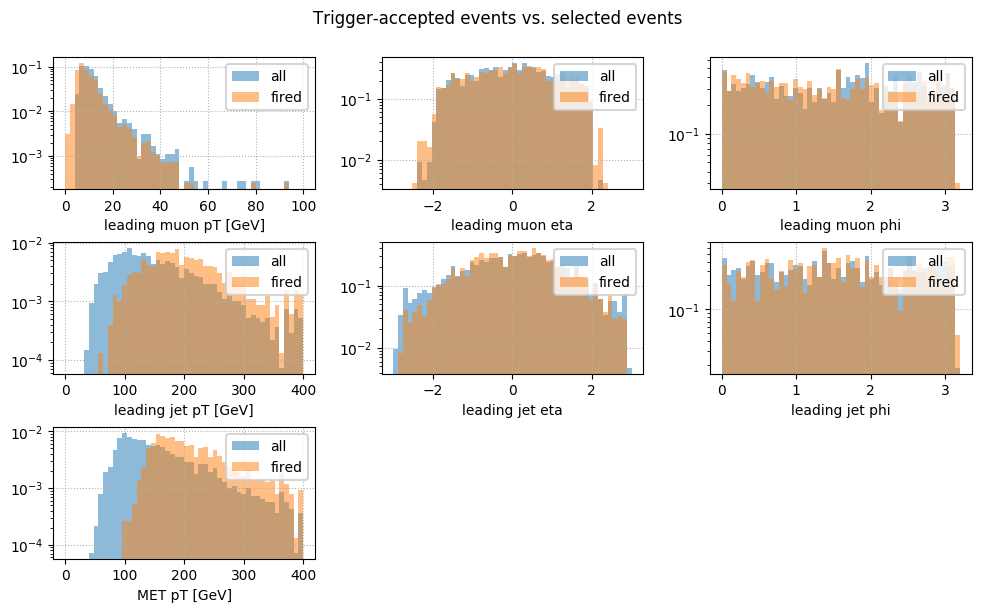

In [33]:
df = dfs[1]
recoDf = dfs[1].dropna()
query = 'fired == True'
fig, axes = plt.subplots(3,3, figsize=(10,6))

fig.suptitle("Trigger-accepted events vs. selected events")
plt.tight_layout(h_pad=2.0)
fig.subplots_adjust(top=0.90)

axes[2, 1].axis('off')
axes[2, 2].axis('off')

labels = [['leading muon pT [GeV]', 'leading muon eta', 'leading muon phi'], \
          ['leading jet pT [GeV]', 'leading jet eta', 'leading jet phi'], \
          ['MET pT [GeV]']]

ranges = [[[0,100], [-3,3], [0,3.2]], \
          [[0,400], [-3,3], [0,3.2]], \
          [[0,400]]]

variables = [['pt', 'eta', 'phi'], \
             ['recoJetPt', 'recoJetEta', 'recoJetPhi'], \
             ['recoPFMetPt']]

properties = {'bins':50, 'density':True, 'log':True, 'alpha':0.5}

for i in range(len(labels)):
    for (j, label) in enumerate(labels[i]):
        properties['range'] = (ranges[i][j])
        properties['label'] = 'all'
        axes[i,j].hist(recoDf[variables[i][j]][:,0], **properties)
        properties['label'] = 'fired'
        axes[i,j].hist(recoDf.query(query)[variables[i][j]], **properties)
        axes[i,j].set_xlabel(label)
        axes[i,j].legend(loc='upper right')
        axes[i,j].grid()

### Trigger efficiency of `HLT_DoubleMu3_DCA_PFMET50_PFMHT60` vs kinematic variables

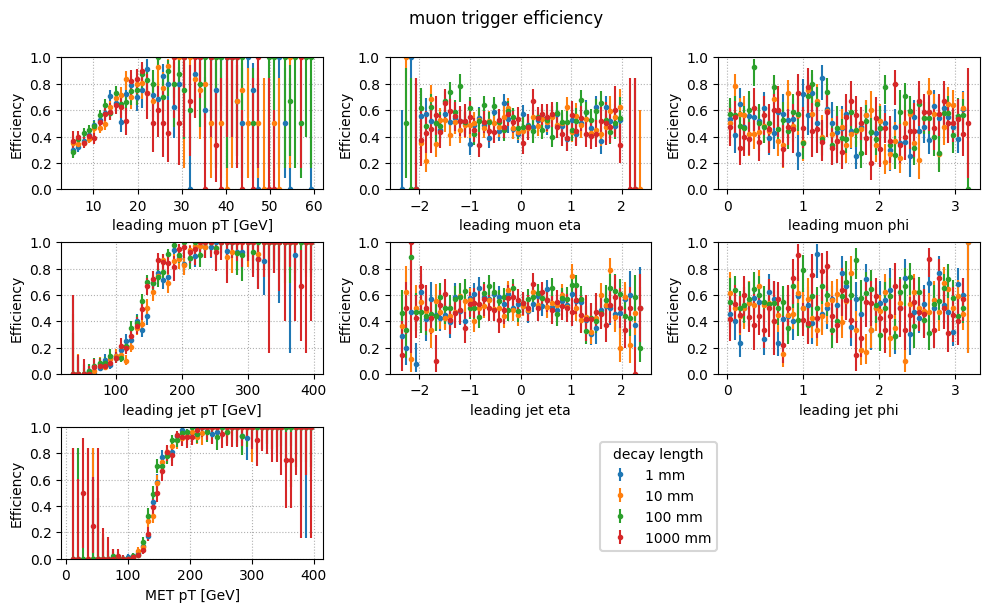

In [20]:
fig, axes = plt.subplots(3,3, figsize=(10,6))
fig.suptitle('muon trigger efficiency')
plt.tight_layout(h_pad=2.0)
fig.subplots_adjust(top=0.90)

axes[2,1].axis('off')
axes[2,2].axis('off')

labels = [['leading muon pT [GeV]', 'leading muon eta', 'leading muon phi'], \
          ['leading jet pT [GeV]', 'leading jet eta', 'leading jet phi'], \
          ['MET pT [GeV]']]

ranges = [[[0,60], [-2.4,2.4], [0,3.2]], \
          [[0,400], [-2.4,2.4], [0,3.2]], \
          [[0,400]]]

variables = [['pt', 'eta', 'phi'], \
             ['recoJetPt', 'recoJetEta', 'recoJetPhi'], \
             ['recoPFMetPt']]

for i in range(len(labels)):
    for (j, label) in enumerate(labels[i]):
        for k, df in dfs.items():
            
            if 'h0' in locals():
                del h0,h1
                
            h0 = ROOT.TH1F(f'h0_1', '', 50, ranges[i][j][0], ranges[i][j][1])
            h1 = ROOT.TH1F(f'h1_1', '', 50, ranges[i][j][0], ranges[i][j][1])

            for l,x in df[variables[i][j]][:,0].iteritems():
                h0.Fill(x)
            for l,x in df.query(query)[variables[i][j]][:,0].iteritems():
                h1.Fill(x)

            eff = ROOT.TEfficiency(h1, h0)
            data = extract_teffi(eff)

            axes[i,j].errorbar(x=data['x'], y=data['y'], yerr=data['yerr'], fmt='o', label=f'{k} mm', ms=3)

            axes[i,j].set_xlabel(labels[i][j])
            axes[i,j].set_ylabel('Efficiency')
            axes[i,j].yaxis.set_major_locator(plt.MaxNLocator(5))
            axes[i,j].set_ylim((0,1))
            axes[i,j].grid(True)
    
fig.legend(loc=(0.6,0.1), title='decay length')

In [21]:
import scipy.special
from scipy.optimize import curve_fit, fsolve
def func(z,p0,p1,p2,p3):
    return p2 + p3*scipy.special.erf((z-p0)/p1)
def func2(z, p0, p1, p2, p3, p4):
    return func(z, p0, p1, p2, p3) - p4*0.98

all_mins = [0]
all_maxs = [10]
all_vars = ['genPt','recoPt']
all_xlabels = ['$p_{T}$ [GeV]']
all_colors = {1:'C0', 10:'C1', 100:'C2', 1000:'C3'}

def make_plot_fit(ax, k, df, variable, nbins, binIni, binEnd):
    h0 = ROOT.TH1F(f'h0_{k}', '', nbins, binIni, binEnd)
    h1 = ROOT.TH1F(f'h1_{k}', '', nbins, binIni, binEnd)
    for l,x in df[variable][:,0].iteritems():
        h0.Fill(x)
    for l,x in df.query(query)[variable][:,0].iteritems():
        h1.Fill(x)
    eff = ROOT.TEfficiency(h1, h0)
    data = extract_teffi(eff)
    ax.errorbar(x=data['x'], y=data['y'], yerr=data['yerr'], fmt=all_colors[k]+'o', markersize=3, alpha=0.3)
#     if variable == 'genPt':
    maxbin = 40
    popt, pcov = curve_fit(func, data['x'][0:maxbin], data['y'][0:maxbin])
    percentile98 = fsolve(func2, 100, (popt[0], popt[1], popt[2], popt[3], popt[2]+popt[3]))
    ax.plot(data['x'][0:maxbin], func(data['x'][0:maxbin], *popt),  \
            label=f'{k} mm, max. = {popt[2]+popt[3]:.2f}, pT @ 98% = {percentile98[0]:.2f}')

/cvmfs/sft.cern.ch/lcg/views/LCG_92python3/x86_64-slc6-gcc62-opt/lib/python3.6/site-packages/scipy/optimize/minpack.py:715: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)
/cvmfs/sft.cern.ch/lcg/views/LCG_92python3/x86_64-slc6-gcc62-opt/lib/python3.6/site-packages/scipy/optimize/minpack.py:161: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)
Warning in <TROOT::Append>: Replacing existing TH1: h0_1 (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: h1_1 (Potential memory leak).


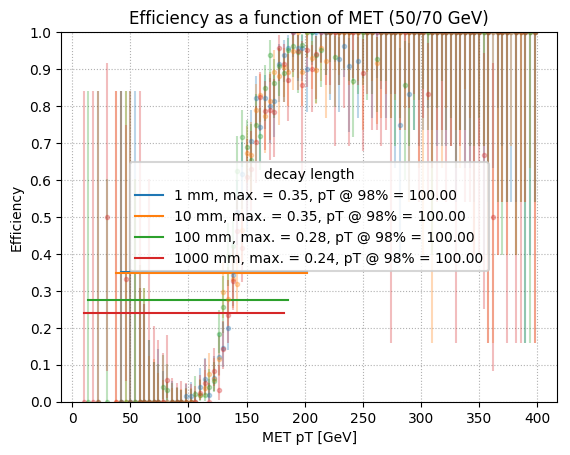

In [22]:
fig, ax = plt.subplots()
make_plot_fit(ax, 1, dfs[1], 'recoPFMetPt', 100, 0, 400)
make_plot_fit(ax, 10, dfs[10], 'recoPFMetPt', 100, 0, 400)
make_plot_fit(ax, 100, dfs[100], 'recoPFMetPt', 100, 0, 400)
make_plot_fit(ax, 1000, dfs[1000], 'recoPFMetPt', 100, 0, 400)

ax.set_xlabel('MET pT [GeV]')
ax.set_ylabel('Efficiency')
ax.yaxis.set_major_locator(plt.MaxNLocator(10))
ax.set_ylim((0,1))
ax.legend(loc='best', title='decay length')
ax.set_title("Efficiency as a function of MET (50/70 GeV)")
ax.grid()

### trigger efficiency itself

In [23]:
trees = OrderedDict({
    0.1 : uproot.open('../Firefighter/washAOD/test/2017/SIDMmumu_Mps-200_MZp-1p2_ctau-1p20e-03_100k.root')['TRIGself_dsa/trigSelfEffiForMuTrack'],
      1 : uproot.open('../Firefighter/washAOD/test/2017/SIDMmumu_Mps-200_MZp-1p2_ctau-0p012_100k.root'   )['TRIGself_dsa/trigSelfEffiForMuTrack'],
     10 : uproot.open('../Firefighter/washAOD/test/2017/SIDMmumu_Mps-200_MZp-1p2_ctau-0p12_100k.root'    )['TRIGself_dsa/trigSelfEffiForMuTrack'],
     50 : uproot.open('../Firefighter/washAOD/test/2017/SIDMmumu_Mps-200_MZp-1p2_ctau-0p6_100k.root'     )['TRIGself_dsa/trigSelfEffiForMuTrack'],
    100 : uproot.open('../Firefighter/washAOD/test/2017/SIDMmumu_Mps-200_MZp-1p2_ctau-1p2_100k.root'     )['TRIGself_dsa/trigSelfEffiForMuTrack'],
    300 : uproot.open('../Firefighter/washAOD/test/2017/SIDMmumu_Mps-200_MZp-1p2_ctau-3p6_100k.root'     )['TRIGself_dsa/trigSelfEffiForMuTrack']     
})

FileNotFoundError: [Errno 2] No such file or directory: '../Firefighter/washAOD/test/2017/SIDMmumu_Mps-200_MZp-1p2_ctau-1p20e-03_100k.root'

In [ ]:
fig,ax = plt.subplots(figsize=(10,8))

fitResult = {}
for k, t in trees.items():
    d = t.array('pt')
    start = d.starts
    denom = d.content[start+2]
    fd = t.array('fired')
    numer = d.content[start[fd]+2]
    
    h0 = ROOT.TH1F(f'h0_{k}', '', 50, 0, 100)
    h1 = ROOT.TH1F(f'h1_{k}', '', 50, 0, 100)
    for x in np.nditer(denom): h0.Fill(x)
    for x in np.nditer(numer): h1.Fill(x)
        
    eff = ROOT.TEfficiency(h1, h0)
    data = extract_teffi(eff)
    fitResult[k] = extract_fitParam_from_teffi(eff)

    ax.errorbar(x=data['x'], y=data['y'], yerr=data['yerr'], fmt='o', label=f'{k} cm')
    
ax.set_title('muon trigger efficiency')
ax.set_xlabel('$p_{T}$ [GeV]')
ax.set_ylabel('Efficiency')
ax.yaxis.set_major_locator(plt.MaxNLocator(10))
ax.set_ylim((0,1))
ax.legend(loc='best', title='decay length')
ax.grid()

print(pd.Series({k: fitResult[k][-1] for k in fitResult})) # not very accurate, need adjust initial parameters for each turn-on curve
pd.DataFrame(fitResult)

In [ ]:
c = ROOT.TCanvas()

t = trees[0.1]
d = t.array('pt')
start = d.starts
denom = d.content[start+2]
fd = t.array('fired')
numer = d.content[start[fd]+2]
    
h0 = ROOT.TH1F(f'h0_{k}', '', 50, 0, 100)
h1 = ROOT.TH1F(f'h1_{k}', '', 50, 0, 100)
for x in np.nditer(denom): h0.Fill(x)
for x in np.nditer(numer): h1.Fill(x)
        
eff = ROOT.TEfficiency(h1, h0)

# print(extract_teffi(eff))

eff.Draw()

# myfit = ROOT.TF1('myfit_', '[2]/(1+exp(-[0]*(x-[1]))) + [3]', 0, 60)
myfit = ROOT.TF1('myfit_', '[2]/(1+exp(-[0]*(x-[1])))', 0, 60)

myfit.SetParameters(0.2, 5, 0.9)
eff.Fit(myfit)

c.Draw()

for i in range(3):
    print('%.6f'%myfit.GetParameter(i))
# print(myfit.GetParameter(2)+ myfit.GetParameter(3))

In [ ]:
fig,ax = plt.subplots(figsize=(10,8))

for k, t in trees.items():
    d = t.array('eta')
    start = d.starts
    denom = d.content[start+2]
    fd = t.array('fired')
    numer = d.content[start[fd]+2]
    
    h0 = ROOT.TH1F(f'h0_{k}', '', 50, -2.0, 2.0)
    h1 = ROOT.TH1F(f'h1_{k}', '', 50, -2.0, 2.0)
    for x in np.nditer(denom): h0.Fill(x)
    for x in np.nditer(numer): h1.Fill(x)
        
    eff = ROOT.TEfficiency(h1, h0)
    data = extract_teffi(eff)

    ax.errorbar(x=data['x'], y=data['y'], yerr=data['yerr'], fmt='^:', label=f'{k} cm')
    
ax.set_title('muon trigger efficiency')
ax.set_xlabel('$\eta$')
ax.set_ylabel('Efficiency')
ax.yaxis.set_major_locator(plt.MaxNLocator(10))
ax.set_ylim((0,1))
ax.legend(loc='best', title='decay length')
ax.grid()

### Trigger efficiency as a function of dark photon's decay length

In [ ]:
dl = np.array([0.1, 1.0, 10., 50., 100., 300.])
eff = {
    'HLT_TrkMu16_DoubleTrkMu6NoFiltersNoVtx': np.array([0.968306, 0.960976, 0.409801, 0.043403, 0.013889, 0.003499])
}

fig, ax = plt.subplots(figsize=(10,8))

for l, v in eff.items():
    ax.semilogx(dl, v, 'o--', label=l)
ax.legend(loc='best')
ax.set_title("muon trigger efficiency (from plateau of turn-on curve's fit)")
ax.set_xlabel('$\gamma_{d}$ decay length [cm]')
ax.set_ylabel('Efficiency')
ax.yaxis.set_major_locator(plt.MaxNLocator(10))
ax.set_ylim((0,1))
ax.grid()

pd.DataFrame(data=eff, index=dl).T